Extracting EDF parameters from e:\VU\11th Semester\CSE 4212 & CSE 4316 (Thesis - Project)\Motor Imagery Classification Using EEG Codes in Python\data\B0401T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


C:\Users\User\AppData\Local\Temp\ipykernel_3208\2381448673.py:30: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, eog=['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from e:\VU\11th Semester\CSE 4212 & CSE 4316 (Thesis - Project)\Motor Imagery Classification Using EEG Codes in Python\data\B0402T.gdf...
GDF file detected
Setting channel info structure...


C:\Users\User\AppData\Local\Temp\ipykernel_3208\2381448673.py:45: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()  # EEG signals: (n_epochs, n_channels, n_times)


Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4
Creating raw.info structure...
Reading 0 ... 696265  =      0.000 ...  2785.060 secs...


C:\Users\User\AppData\Local\Temp\ipykernel_3208\2381448673.py:30: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, eog=['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 140 events and 1001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from e:\VU\11th Semester\CSE 4212 & CSE 4316 (Thesis - Project)\Motor Imagery Classification Using EEG Codes in Python\data\B0403T.gdf...
GDF file detected


C:\Users\User\AppData\Local\Temp\ipykernel_3208\2381448673.py:45: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()  # EEG signals: (n_epochs, n_channels, n_times)


Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4
Creating raw.info structure...
Reading 0 ... 468558  =      0.000 ...  1874.232 secs...


C:\Users\User\AppData\Local\Temp\ipykernel_3208\2381448673.py:30: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, eog=['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770', '781']
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 160 events and 1001 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None


C:\Users\User\AppData\Local\Temp\ipykernel_3208\2381448673.py:45: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()  # EEG signals: (n_epochs, n_channels, n_times)


    Using tolerance 9.1e-07 (2.2e-16 eps * 3 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-07 (2.2e-16 eps * 3 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.


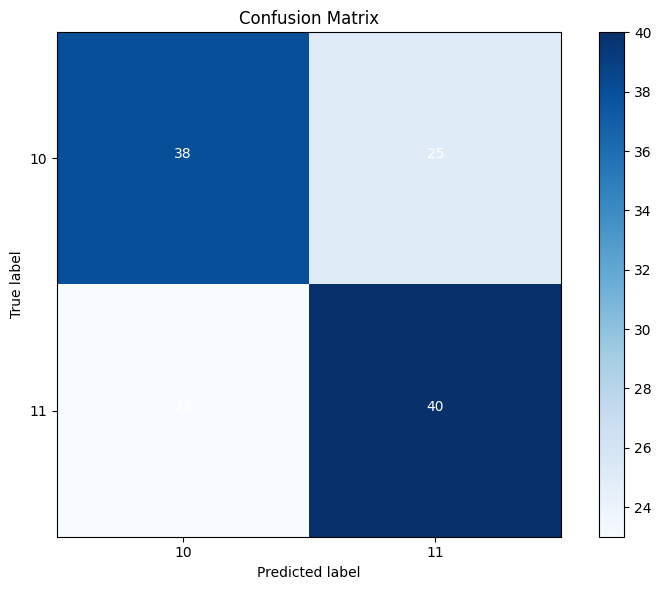

Accuracy List: [0.6190476190476191]


In [1]:
import mne
import numpy as np
from scipy.signal import butter, filtfilt
from mne.decoding import CSP
from sklearn.neighbors import KNeighborsClassifier  # Import KNN classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
 
# Define the bandpass filter function
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data, axis=-1)
    return y
 
def classification(file_paths):
    global X_combined, y_combined, raw, X_train, X_test, X, y
 
    # Initialize lists to hold combined data and labels
    X_combined = []
    y_combined = []
 
    for file_path in file_paths:
        # Load the .gdf file
        raw = mne.io.read_raw_gdf(file_path, preload=True, eog=['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])
 
        # Drop EOG channels
        raw.drop_channels(['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])
 
        # Extract events
        events, event_id = mne.events_from_annotations(raw)
       
        e = event_id
       
        event_id = {'left_hand': e['769'], 'right_hand': e['770']}
 
        epochs = mne.Epochs(raw, events, event_id, tmin=3, tmax=7, baseline=None, preload=True)
 
        # Get the data and labels
        X = epochs.get_data()  # EEG signals: (n_epochs, n_channels, n_times)
        y = epochs.events[:, -1]  # Labels
 
        # Apply a bandpass filter from 8 Hz to 30 Hz
        X_filtered = np.array([butter_bandpass_filter(epoch, 8, 30, raw.info['sfreq']) for epoch in X])
 
        # Append filtered data and labels to the combined lists
        X_combined.append(X_filtered)
        y_combined.append(y)
 
    # Concatenate all data and labels
    X_combined = np.concatenate(X_combined, axis=0)
    y_combined = np.concatenate(y_combined, axis=0)
 
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=120)
 
    # Ensure there are at least two classes in the training set
    while len(np.unique(y_train)) < 2:
        X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=120)
       
        # After re-splitting, check again
        if len(np.unique(y_train)) >= 2:
            break
 
    # Check the number of unique classes in y_train after the loop
    if len(np.unique(y_train)) < 2:
        raise ValueError("Could not find at least two classes in the training set.")
 
    # Initialize CSP
    csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
 
    # Fit CSP on training data
    csp.fit(X_train, y_train)
 
    # Transform training and testing data with CSP
    X_train_csp = csp.transform(X_train)
    X_test_csp = csp.transform(X_test)
 
    # Standardize the data
    scaler = StandardScaler()
    X_train_csp = scaler.fit_transform(X_train_csp)
    X_test_csp = scaler.transform(X_test_csp)
 
    # Initialize and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
    knn.fit(X_train_csp, y_train)
 
    # Test the model
    accuracy = knn.score(X_test_csp, y_test)
 
    # Compute confusion matrix
    predictions = knn.predict(X_test_csp)
    cm = confusion_matrix(y_test, predictions)
 
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
 
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
 
    return accuracy
 
allData = {
    "patient_1": ['data/B0401T.gdf', 'data/B0402T.gdf', 'data/B0403T.gdf']
}
 
accuracy_list = []
for data_files in allData.values():
    accuracy_list.append(classification(data_files))
 
print("Accuracy List:", accuracy_list)
 